# One-sided t-Test

In [277]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

**Scenario:** population variance is not known

Putting together sample variances to estimate a population variance is called "pooling"

$$s _ { p } ^ { 2} = \frac { \left( N _ { 1} - 1\right) s _ { 1} ^ { 2} + \left( N _ { 2} - 1\right) s _ { 2} ^ { 2} } { \left( N _ { 1} - 1\right) + \left( N _ { 2} - 1\right) }$$

The denominator $$\left( N _ { 1} - 1\right) + \left( N _ { 2} - 1\right)$$ is called **Degree of Freedom (df)**.

### Hypothesis

$$\left.\begin{array} { c } { H _ { 0} : \mu _ { 1} - \mu _ { 2} \leq 0} \\ { H _ { 1} : \mu _ { 1} - \mu _ { 2} > 0} \end{array} \right.$$

### Data

Machine Production time per day measured for 10 days.

In [282]:
machine_1 = np.array([24.58, 22.09, 23.70, 18.89, 22.02, 28.71, 24.44, 20.91, 23.83, 20.83])

In [283]:
machine_2 = np.array([21.61, 19.06, 20.72, 15.77, 19.0, 25.88, 21.44,17.85, 20.86, 17.77])

In [284]:
df = pd.DataFrame({'m1_prod_time':machine_1, 'm2_prod_time':machine_2}) 

In [285]:
df.index.name = 'day'

In [286]:
df

,m1_prod_time,m2_prod_time
day,,
0,24.58,21.61
1,22.09,19.06
2,23.70,20.72
3,18.89,15.77
4,22.02,19.00
5,28.71,25.88
6,24.44,21.44
7,20.91,17.85
8,23.83,20.86


In [287]:
m1_mean = round(df['m1_prod_time'].mean(), 2) 
m2_mean = round(df['m2_prod_time'].mean(), 2)

In [289]:
print(f'Maschine 1 Avg. Production Time: {m1_mean} h. Maschine 2 Avg. Production Time: {m2_mean} h.')

Maschine 1 Avg. Production Time: 23.0 h. Maschine 2 Avg. Production Time: 20.0 h.


### Visualisation

with Pandas

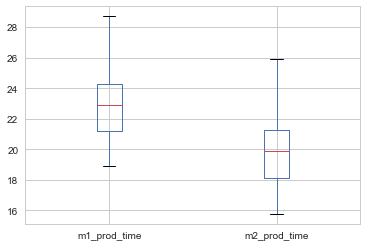

In [302]:
df.boxplot();

with Seaborn

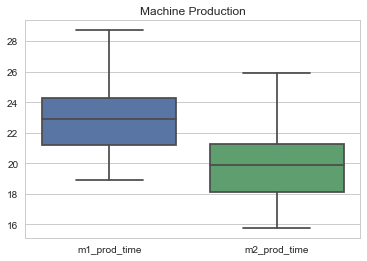

In [303]:
sns.boxplot(data=df).set_title("Machine Production");

### Test-Statistik

$$t = \frac { \left( \overline { x } _ { 1} - \overline { x } _ { 2} \right) - \left( \mu _ { 1} - \mu _ { 2} \right) } { s _ { p } \sqrt { \frac { 1} { N _ { 1} } + \frac { 1} { N _ { 2} } } }$$

Using a t-test since sample size < 30 and population distribution **not** known.

In [290]:
significance_level = 0.05

In [291]:
statistic, pvalue = stats.ttest_ind(df['m1_prod_time'], df['m2_prod_time'], equal_var=True)

In [292]:
statistic

2.4438973586184982

In [293]:
pvalue

0.025057263132725688

### Interpretation

In [297]:
print(f'α = {significance_level} (significance level). Since {round(pvalue, 2)} < {significance_level}')

α = 0.05 (significance level). Since 0.03 < 0.05


$ H _ { 0} $ can be rejected.